In [27]:
from torch.nn import Module
from torch import nn
#import torch.functional as F
import torch.nn.functional as F

In [30]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training dataset
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(root='.', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])), batch_size=64, shuffle=True, num_workers=4)

In [69]:
class STN(Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()

        self.localization= nn.Sequential(
            nn.Conv2d(1,8,kernel_size=7),
            nn.MaxPool2d(2,stride=2),
            nn.ReLU(inplace=True),
            nn.Conv2d(8,10,kernel_size=5),
            nn.MaxPool2d(2,stride=2),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((3,3))
        )

        

        self.fc_loc=nn.Sequential(
            nn.Linear(10*3*3,32),
            nn.ReLU(inplace=True),
            nn.Linear(32,3*2)
        )
        print(self.fc_loc)
        self.fc_loc[2].weight.data.zero_()
        self.fc_loc[2].bias.data.copy_(torch.tensor([1, 0, 0, 0, 1, 0], dtype=torch.float))
        print(self.fc_loc)
    def forward(self,x):
        xs=self.localization(x)
        xs=xs.view(-1,10*3*3)
        theta=self.fc_loc(xs)
        theta=theta.view(-1,2,3)

        grid=F.affine_grid(theta,x.size())
        x=F.grid_sample(x,grid)
        return x

In [70]:
model=STN(3,64)

Sequential(
  (0): Linear(in_features=90, out_features=32, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=32, out_features=6, bias=True)
)
Sequential(
  (0): Linear(in_features=90, out_features=32, bias=True)
  (1): ReLU(inplace=True)
  (2): Linear(in_features=32, out_features=6, bias=True)
)


In [71]:
for batch in train_loader:
    break

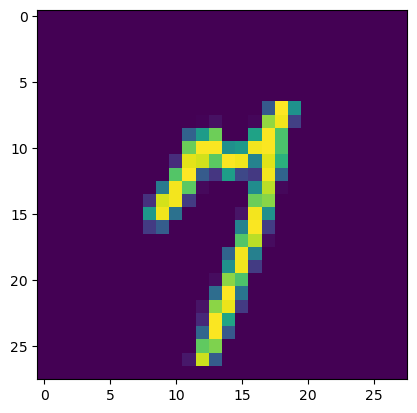

In [72]:
plt.imshow(batch[0][0].permute(1,2,0))

In [73]:
batch[1][0]

tensor(7)

In [74]:
pred=model(batch[0])

/usr/lib/python3.14/site-packages/torch/nn/functional.py:5167: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/usr/lib/python3.14/site-packages/torch/nn/functional.py:5100: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


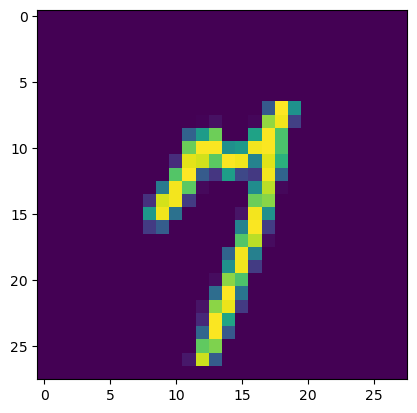

In [75]:
plt.imshow(pred[0].permute(1,2,0).detach())